# Représenter l'évolution et les types de dépôts dans HAL d'une structure

- extraire depuis HAL le nombre de publications d'une année d'une structure
- créer une fonction avec en argument l'année
- créer une boucle pour récupérer les données depuis l'API de HAL
- placer les données dans un dictionnaire
- le transformer en une dataframe (attention a `pd.DataFrame({"col":[data1, data2], "col2":[0, 1, 2, 3]})` )
- faire une représentation en histogramme
- reprendre l'exercice en intrégrant le type de dépot (file/notice) dans la fonction
- créer une variable `structId` pour générer le graph. sur n'importe qu'elle structure


In [2]:
import pandas as pd, json, requests

In [3]:
req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=structId_i:116256&fq=publicationDateY_i:2020&rows=0")
req = req.json()
num = req['response']['numFound']
num

2802

In [4]:
def req_hal(year, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/?q=structId_i:116256&fq=publicationDateY_i:{year}&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [5]:
req_hal(2019, "notice")

1854

In [6]:
data = {}
subtypes = ["file", "notice"]
for year in range(2016, 2022):
    data[year] = {}
    for st in subtypes : 
        num = req_hal(year, st)
        data[year][st] = num
        
data

{2016: {'file': 1978, 'notice': 1853},
 2017: {'file': 2130, 'notice': 1891},
 2018: {'file': 2050, 'notice': 2077},
 2019: {'file': 1967, 'notice': 1854},
 2020: {'file': 1602, 'notice': 1171},
 2021: {'file': 1487, 'notice': 1057}}

In [7]:
df = pd.DataFrame.from_dict(data)
df = df.T # pour inverser colonnes et lignes
df

,file,notice
2016,1978,1853
2017,2130,1891
2018,2050,2077
2019,1967,1854
2020,1602,1171
2021,1487,1057


<AxesSubplot:>

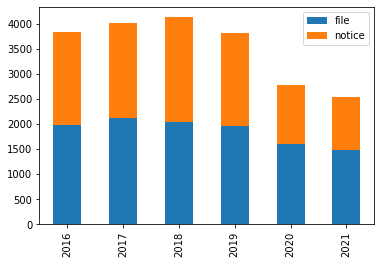

In [8]:
df.plot.bar(stacked = True)